In [1]:
from numpy import * 
from os import listdir 
import matplotlib 
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np1 
import numpy.linalg as np 
from scipy.stats.stats import pearsonr

C:\Users\Admin\AppData\Local\Temp\ipykernel_13052\2597369221.py:8: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [2]:
def kernel(point,xmat, k):
    m,n = np1.shape(xmat) 
    weights = np1.mat(np1.eye((m))) 
    for j in range(m): 
        diff = point - X[j] 
        weights[j,j] = np1.exp(diff*diff.T/(-2.0*k**2)) 
    return weights



In [3]:
def localWeight(point,xmat,ymat,k): 
    wei = kernel(point,xmat,k) 
    W = (X.T*(wei*X)).I*(X.T*(wei*ymat.T)) 
    return W

In [4]:
def localWeightRegression(xmat,ymat,k):
    m,n = np1.shape(xmat) 
    ypred = np1.zeros(m) 
    for i in range(m): 
        ypred[i] = xmat[i]*localWeight(xmat[i],xmat,ymat,k) 
    return ypred

In [6]:
#load data points 
data = pd.read_csv('tips.csv') 
bill = np1.array(data.total_bill) 
tip = np1.array(data.tip)

In [7]:
#preparing and add 1 in bill 
mbill = np1.mat(bill) 
mtip = np1.mat(tip) 
# mat is used to convert to n dimesiona to 2 dimensional array form 
m= np1.shape(mbill)[1] # print(m) 244 data is stored in m 
one = np1.mat(np1.ones(m)) 
X= np1.hstack((one.T,mbill.T)) # create a stack of bill from ONE 
print(X) 
#set k here 
ypred = localWeightRegression(X,mtip,2) 
SortIndex = X[:,1].argsort(0)

[[ 1.   16.99]
 [ 1.   10.34]
 [ 1.   21.01]
 [ 1.   23.68]
 [ 1.   24.59]
 [ 1.   25.29]
 [ 1.    8.77]
 [ 1.   26.88]
 [ 1.   15.04]
 [ 1.   14.78]
 [ 1.   10.27]
 [ 1.   35.26]
 [ 1.   15.42]
 [ 1.   18.43]
 [ 1.   14.83]
 [ 1.   21.58]
 [ 1.   10.33]
 [ 1.   16.29]
 [ 1.   16.97]
 [ 1.   20.65]
 [ 1.   17.92]
 [ 1.   20.29]
 [ 1.   15.77]
 [ 1.   39.42]
 [ 1.   19.82]
 [ 1.   17.81]
 [ 1.   13.37]
 [ 1.   12.69]
 [ 1.   21.7 ]
 [ 1.   19.65]
 [ 1.    9.55]
 [ 1.   18.35]
 [ 1.   15.06]
 [ 1.   20.69]
 [ 1.   17.78]
 [ 1.   24.06]
 [ 1.   16.31]
 [ 1.   16.93]
 [ 1.   18.69]
 [ 1.   31.27]
 [ 1.   16.04]
 [ 1.   17.46]
 [ 1.   13.94]
 [ 1.    9.68]
 [ 1.   30.4 ]
 [ 1.   18.29]
 [ 1.   22.23]
 [ 1.   32.4 ]
 [ 1.   28.55]
 [ 1.   18.04]
 [ 1.   12.54]
 [ 1.   10.29]
 [ 1.   34.81]
 [ 1.    9.94]
 [ 1.   25.56]
 [ 1.   19.49]
 [ 1.   38.01]
 [ 1.   26.41]
 [ 1.   11.24]
 [ 1.   48.27]
 [ 1.   20.29]
 [ 1.   13.81]
 [ 1.   11.02]
 [ 1.   18.29]
 [ 1.   17.59]
 [ 1.   20.08]
 [ 1.   16

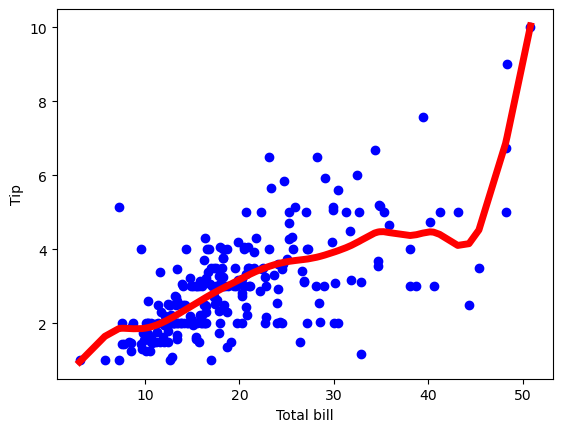

In [8]:
xsort = X[SortIndex][:,0] 
fig = plt.figure() 
ax = fig.add_subplot(1,1,1) 
ax.scatter(bill,tip, color='blue') 
ax.plot(xsort[:,1],ypred[SortIndex], color = 'red', linewidth=5) 
plt.xlabel('Total bill') 
plt.ylabel('Tip') 
plt.show();

In [9]:
import numpy as np 
from bokeh.plotting import figure, show, output_notebook 
from bokeh.layouts import gridplot 
from bokeh.io import push_notebook

In [10]:
def local_regression(x0, X, Y, tau):
    # add bias term 
    x0 = np.r_[1, x0] 
    # Add one to avoid the loss in information 
    X = np.c_[np.ones(len(X)), X] 
    # fit model: normal equations with kernel 
    xw = X.T * radial_kernel(x0, X, tau) # XTranspose * W 
    beta = np.linalg.pinv(xw @ X) @ xw @ Y #@ Matrix Multiplication or Dot Product
    return x0 @ beta # @ Matrix Multiplication or Dot Product for prediction

In [11]:
def radial_kernel(x0, X, tau):
    return np.exp(np.sum((X - x0) ** 2, axis=1) / (-2 * tau * tau))
# Weight or Radial Kernal Bias Function

n = 1000
# generate dataset
X = np.linspace(-3, 3, num=n)
print("The Data Set ( 10 Samples) X :\n",X[1:10]) 
Y = np.log(np.abs(X ** 2 - 1) + .5)
print("The Fitting Curve Data Set (10 Samples) Y:\n",Y[1:10])
# jitter X
X += np.random.normal(scale=.1, size=n) 
print("Normalised (10 Samples) X :\n",X[1:10])

domain = np.linspace(-3, 3, num=300)
print(" Xo Domain Space(10 Samples) :\n",domain[1:10]) 

The Data Set ( 10 Samples) X :
 [-2.99399399 -2.98798799 -2.98198198 -2.97597598 -2.96996997 -2.96396396
 -2.95795796 -2.95195195 -2.94594595]
The Fitting Curve Data Set (10 Samples) Y:
 [2.13582188 2.13156806 2.12730467 2.12303166 2.11874898 2.11445659
 2.11015444 2.10584249 2.10152068]
Normalised (10 Samples) X :
 [-2.95347326 -2.93632603 -2.97075312 -2.93431453 -2.95954959 -2.91932147
 -2.85520008 -2.81101981 -3.11523441]
 Xo Domain Space(10 Samples) :
 [-2.97993311 -2.95986622 -2.93979933 -2.91973244 -2.89966555 -2.87959866
 -2.85953177 -2.83946488 -2.81939799]


In [12]:
def plot_lwr(tau):
    # prediction through regression
    prediction = [local_regression(x0, X, Y, tau) for x0 in domain]
    plot = figure(plot_width=400, plot_height=400) 
    plot.title.text='tau=%g' % tau
    plot.scatter(X, Y, alpha=.3)
    plot.line(domain, prediction, line_width=2, color='red')
    return plot

show(gridplot([[plot_lwr(10.), plot_lwr(1.)],
[plot_lwr(0.1), plot_lwr(0.01)]]))

C:\Users\Admin\AppData\Local\Temp\ipykernel_13052\2773174117.py:8: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


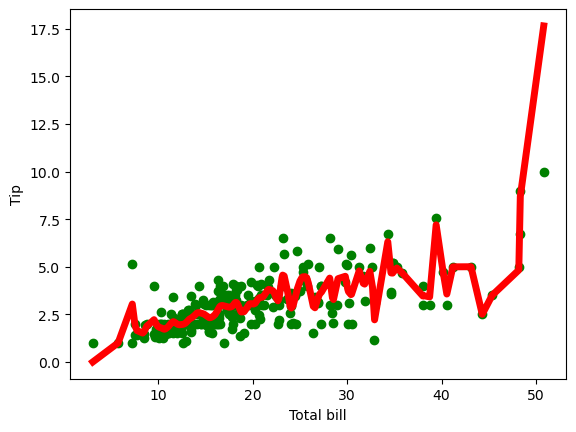

In [13]:
from numpy import *
from os import listdir
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np1
import numpy.linalg as np
from scipy.stats.stats import pearsonr
 
def kernel(point,xmat, k):
    m,n = np1.shape(xmat)
    weights = np1.mat(np1.eye((m)))
    for j in range(m):
        diff = point - X[j]
        weights[j,j] = np1.exp(diff*diff.T/(-2.0*k**2))
    return weights
 
def localWeight(point,xmat,ymat,k):
    wei = kernel(point,xmat,k)
    W = (X.T*(wei*X)).I*(X.T*(wei*ymat.T))
    return W
     
def localWeightRegression(xmat,ymat,k):
    m,n = np1.shape(xmat)
    ypred = np1.zeros(m)
    for i in range(m):
        ypred[i] = xmat[i]*localWeight(xmat[i],xmat,ymat,k)
    return ypred
       
# load data points
data = pd.read_csv('tips.csv')
bill = np1.array(data.total_bill)
tip = np1.array(data.tip)
 
#preparing and add 1 in bill
mbill = np1.mat(bill)
mtip = np1.mat(tip) # mat is used to convert to n dimesiona to 2 dimensional array form
m= np1.shape(mbill)[1]
# print(m) 244 data is stored in m
one = np1.mat(np1.ones(m)) 
X= np1.hstack((one.T,mbill.T)) # create a stack of bill from ONE
#print(X)
#set k here
ypred = localWeightRegression(X,mtip,0.3) 
SortIndex = X[:,1].argsort(0)
xsort = X[SortIndex][:,0]
     
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(bill,tip, color='green')
ax.plot(xsort[:,1],ypred[SortIndex], color = 'red', linewidth=5)
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.show();